# Chapter 2

In [5]:
from keras.datasets import mnist
import numpy as np

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
from keras import models, layers

In [9]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

In [13]:
train_images = train_images.reshape((60000, 28*28))
# now unrolled
train_images.shape

(60000, 784)

In [15]:
train_images = train_images.astype('float32') / 255
train_images[1:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [19]:
from keras.utils import to_categorical

In [20]:
train_labels[1:5]

array([0, 4, 1, 9], dtype=uint8)

In [21]:
# this is creating our vectorized output, so that the last layer of the network can 
# compare to a vector
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
train_labels[1:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [24]:
# train the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 1.4845 - accuracy: 0.6583
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.5933 - accuracy: 0.8520
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.4134 - accuracy: 0.8878
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.3538 - accuracy: 0.9006
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3245 - accuracy: 0.9078


In [25]:
# get test set metrics
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test accuracy: {}".format(test_acc))

10000/10000 [==============================] - 0s 36us/step
test accuracy: 0.819599986076355


In [26]:
x = np.array(12)
x

array(12)

In [27]:
x.ndim

0

In [30]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images.shape

(60000, 28, 28)

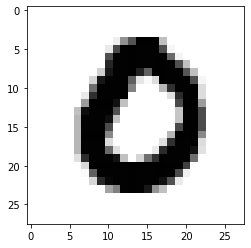

In [32]:
import matplotlib.pyplot as plt
digit = train_images[4565]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [33]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100, :28, :28]
my_slice.shape

(90, 28, 28)

In [39]:
# broadcasting
# smaller tensor is broadcast to become the shape of larger tensor by:
# 1. adding axes to smaller tensor to match ndim of larger
# 2. smaller tensor is repeated alongside new axes to match new shape (larger tensor)

x = np.random.random((64,3,32,10))
y = np.random.random((32, 10))

z = x + y
z.shape

(64, 3, 32, 10)

In [41]:
y = y.reshape((160,2))

In [42]:
y.shape

(160, 2)

In [43]:
np.transpose(y).shape

(2, 160)